### Implementando a lógica de NPS com comandos simples e sequenciais(imperativo)

In [11]:
import pandas as pd

dados = pd.read_csv("./feedbacks.csv", delimiter=';')
detratores = 0
promotores = 0
notas = dados['nota']

for nota in notas:
  if nota >= 9:
    promotores += 1
  elif nota <= 6:
    detratores += 1
    
nps = (promotores - detratores) / len(notas) * 100
print(nps)

40.0


### Evoluindo a implementação para separar as responsabilidades.(funcional)

In [12]:
import pandas as pd

def calcular_nps(notas):
  detratores = 0
  promotores = 0
  
  for nota in notas:
    if nota >= 9:
      promotores += 1
    elif nota <= 6:
      detratores += 1
  nps = (promotores - detratores) / len(notas) * 100
  return nps



dados = pd.read_csv("./feedbacks.csv", delimiter=';')

notas = dados['nota']
print(calcular_nps(notas))


40.0


### Abstrair o problema usando classes e objetos.(Orientação a objetos)

In [4]:
import pandas as pd

class Feedback:
  def __init__(self, nota, comentario):
    self.nota = nota  
    self.comentario = comentario
    
class AnalisadorFeedback:
  def __init__(self, feedbacks):
    self.feedbacks = feedbacks

  def calcular_nps(self):
    detratores = sum([1 for feedback in self.feedbacks if feedback.nota <= 6])
    promotores = sum([1 for feedback in self.feedbacks if feedback.nota >= 9])

    nps = (promotores - detratores) / len(self.feedbacks) * 100
    return nps

dados = pd.read_csv("./feedbacks.csv", delimiter=';')

feedbacks = [Feedback(linha['nota'], linha['comentario']) for indice, linha in dados.iterrows()]

analisador = AnalisadorFeedback(feedbacks)
nps = analisador.calcular_nps()
print(nps)

40.0


### Adicionando arquivo CSV no google drive para fazer conexão direta

In [2]:
import pandas as pd
import gdown

# variavel da file_id foi criada apenas para facilitar o parametro que é passado no link.
file_id = '1U1HEw_LKHREjPDymZ1Ec82hPlzJ03ijb'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'feedbacks.csv')



Downloading...
From: https://drive.google.com/uc?id=1U1HEw_LKHREjPDymZ1Ec82hPlzJ03ijb
To: c:\Users\cs376562\Desktop\AulaCaio\Scripts\Python\ifood_dev_week\feedbacks.csv
100%|██████████| 118/118 [00:00<00:00, 118kB/s]


'feedbacks.csv'

In [3]:
dados = pd.read_csv('./feedbacks.csv', delimiter=';')


### Aplicando tecnicas de ETL(Extração, Transfornação e carregamento (extract, transform e load) nos dados)

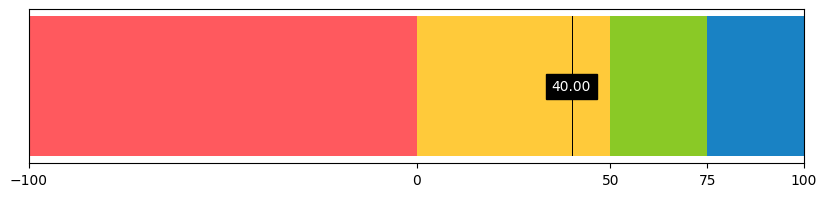

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Definição das constantes que usaremos para visualizar o NPS
NPS_ZONAS =   ['Crítico', 'Aperfeiçoamento', 'Qualidade', 'Excelência']
NPS_VALORES = [-100, 0, 50, 75, 100]
NPS_CORES =   ['#FF595E', '#FFCA3A', '#8AC926', '#1982C4']


def criar_grafico_nps(nps):
  fig, ax = plt.subplots(figsize=(10,2))
  
  for indice, zona in enumerate(NPS_ZONAS):
    ax.barh([0], width=NPS_VALORES[indice + 1] - NPS_VALORES[indice], left=NPS_VALORES[indice], color=NPS_CORES[indice])
    
  #essa linha abaixo mostra o valor do NPS que foi dado como nota em nossa pesquisa.  
  ax.barh([0], width=0.5, left=nps, color='black')
  #essa linha estou removendo a legenda do eixo Y.  
  ax.set_yticks([])
  #essa linha eu faço o limite do grafico no eixo x ser de -100 até 100.  
  ax.set_xlim(-100,100)
  #essa linha deixo apenas a legenda no eixo x seguindo os numeros do array NPS_VALORES.  
  ax.set_xticks(NPS_VALORES)
  
  plt.text(nps, 0, f'{nps:.2f}', ha='center', va='center',color='white',bbox=dict(facecolor='black'))
  
  
  
  plt.show()
  
criar_grafico_nps(nps)